importing all required modoules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = "C:/Users/pc/Downloads/train.csv" 
df = pd.read_csv(file_path)
print("Shape:", df.shape)
df.head()


Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.describe()
df.value_counts()
df.info()  
display(df.describe(include='all').transpose())  # descriptive stats

# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean()*100).sort_values(ascending=False)
display(pd.concat([missing, missing_pct], axis=1, keys=['missing_count', 'missing_pct']).head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


,missing_count,missing_pct
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


cleaning the  data

In [10]:
df_clean = df.copy()

for c in df_clean.select_dtypes(include=['object']).columns:
    df_clean[c] = df_clean[c].str.strip()

df_clean['HasCabin'] = df_clean['Cabin'].notnull().astype(int)
df_clean['Age_median_fill'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean[['Age', 'Age_median_fill', 'Cabin', 'HasCabin']].head()


,Age,Age_median_fill,Cabin,HasCabin
0,22.0,22.0,NaN,0
1,38.0,38.0,C85,1
2,26.0,26.0,NaN,0
3,35.0,35.0,C123,1
4,35.0,35.0,NaN,0


visualization

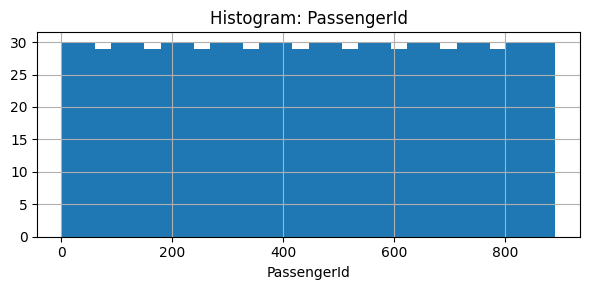

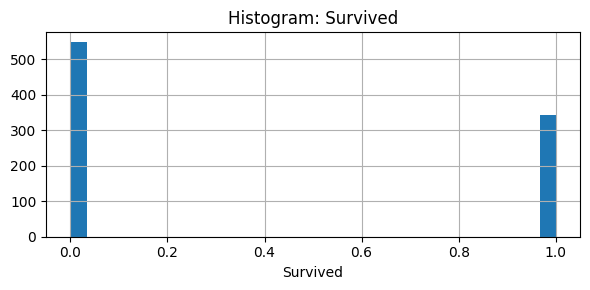

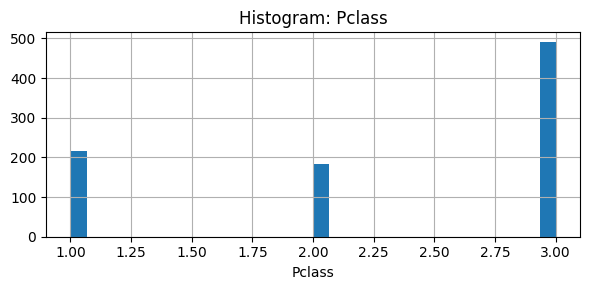

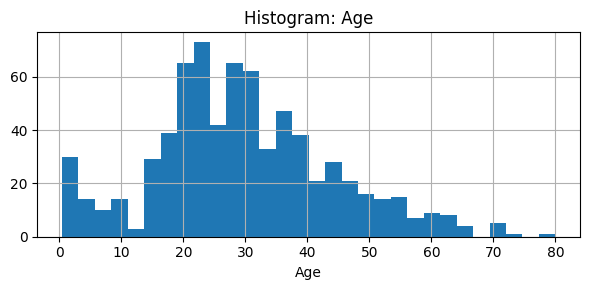

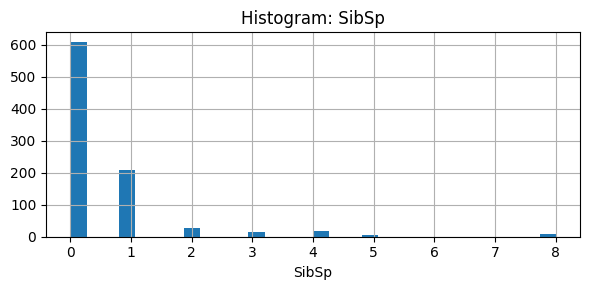

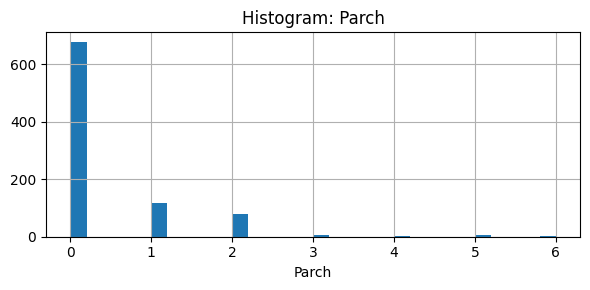

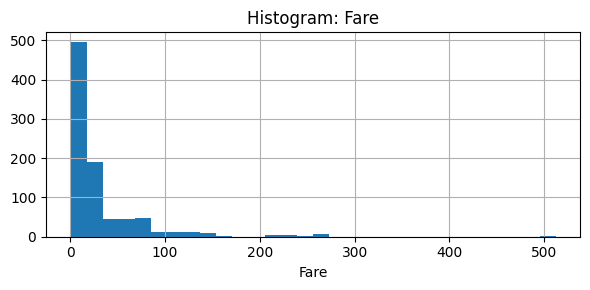

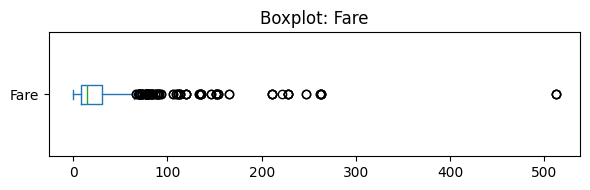

In [11]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(6,3))
    df[col].hist(bins=30)
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    
plt.figure(figsize=(6,2))
df[col].plot(kind='box', vert=False)
plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
Moran, Mr. James                                       1
McCarthy, Mr. Timothy J                                1
Palsson, Master. Gosta Leonard                         1
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      1
Nasser, Mrs. Nicholas (Adele Achem)                    1
Abelson, Mrs. Samuel (Hannah Wizosky)                  1
Vander Cruyssen, Mr. Victor                            1
Carlsson, Mr. Frans Olof                               1
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1
Balkic, Mr. Cerin                                      1
Johnson, Master. Harold Theodor                        1
van Melkebeke, Mr. Philemo

C:\Users\pc\AppData\Local\Temp\ipykernel_9436\2628570393.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


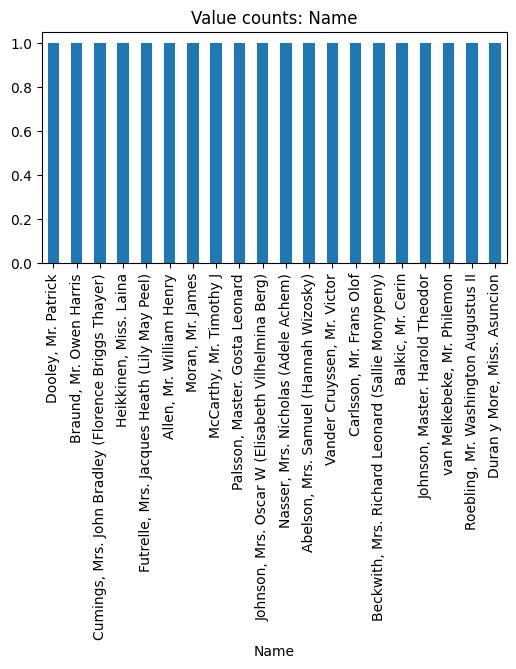

Sex
male      577
female    314
Name: count, dtype: int64

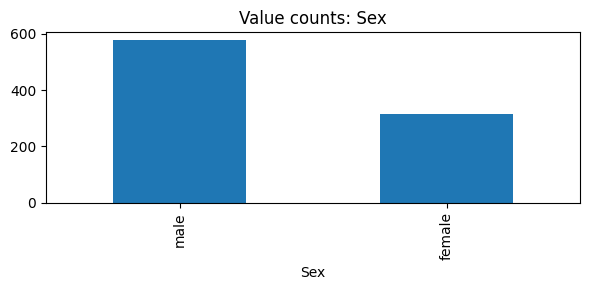

Ticket
347082          7
1601            7
CA. 2343        7
3101295         6
CA 2144         6
347088          6
382652          5
S.O.C. 14879    5
113760          4
19950           4
349909          4
347077          4
4133            4
2666            4
113781          4
17421           4
W./C. 6608      4
LINE            4
PC 17757        4
363291          3
Name: count, dtype: int64

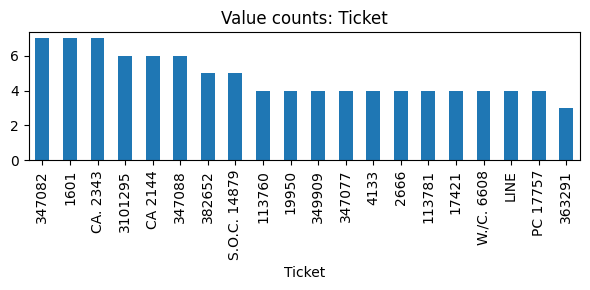

Cabin
NaN            687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
D                3
E101             3
C22 C26          3
F33              3
C83              2
C123             2
B28              2
D26              2
B58 B60          2
E33              2
D33              2
C52              2
F G73            2
B77              2
C93              2
Name: count, dtype: int64

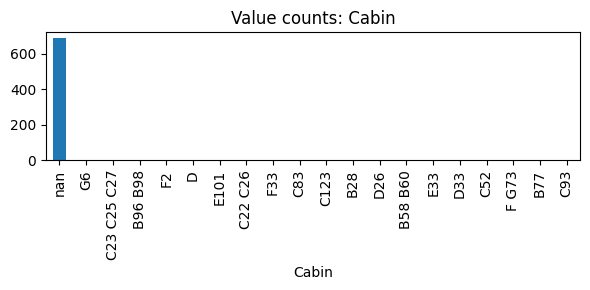

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

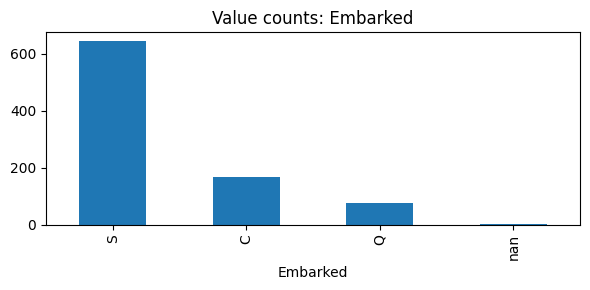

In [12]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in cat_cols:
    vc = df[col].value_counts(dropna=False).head(20)
    display(vc)
    plt.figure(figsize=(6,3))
    vc.plot(kind='bar')
    plt.title(f'Value counts: {col}')
    plt.tight_layout()
    plt.show()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


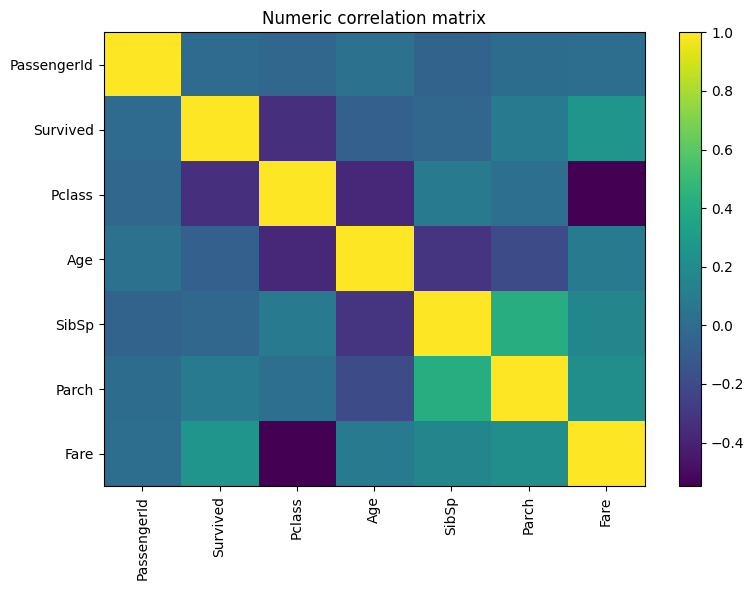

TypeError: agg function failed [how->mean,dtype->object]

In [13]:
num = df.select_dtypes(include=[np.number])
corr = num.corr()
display(corr)

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Numeric correlation matrix')
plt.tight_layout()
plt.show()

# If there's a target (Survived), compare means
if 'Survived' in df.columns:
    display(df.groupby('Survived').mean())
    print("\nSurvival by Sex (%)")
    print((df.groupby('Sex')['Survived'].mean()*100).round(2))


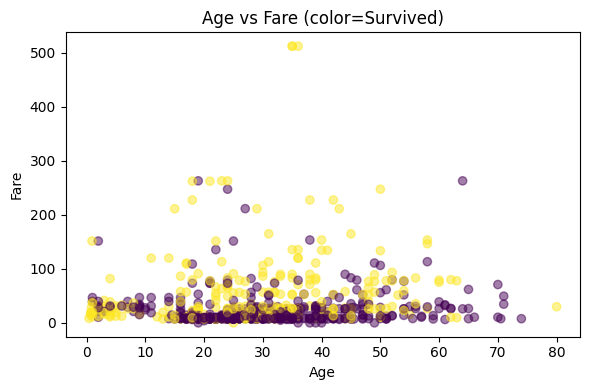

In [14]:
if 'Age' in df.columns and 'Fare' in df.columns:
    plt.figure(figsize=(6,4))
    survived = df['Survived'] if 'Survived' in df.columns else None
    plt.scatter(df['Age'], df['Fare'], c=(survived if survived is not None else 'b'), alpha=0.5)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title('Age vs Fare (color=Survived)')
    plt.tight_layout()
    plt.show()





Survival rate by Sex:


Sex
female    74.20
male      18.89
Name: Survived, dtype: float64

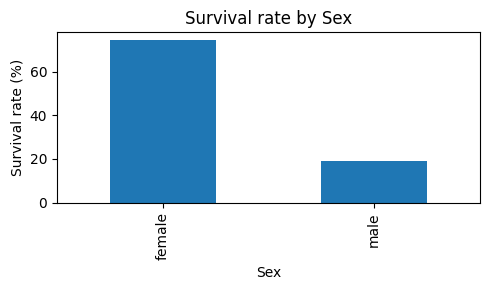


Survival rate by Pclass:


Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64

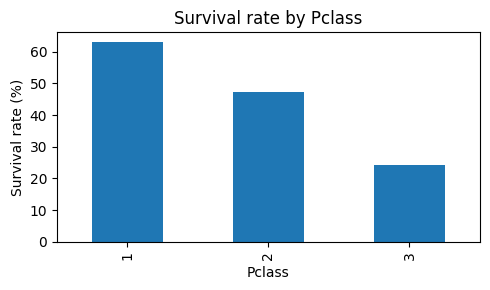

In [15]:
if 'Survived' in df.columns:
    for col in ['Sex','Pclass','HasCabin']:
        if col in df.columns:
            print(f'\nSurvival rate by {col}:')
            display((df.groupby(col)['Survived'].mean()*100).round(2))
            (df.groupby(col)['Survived'].mean()*100).plot(kind='bar', figsize=(5,3), title=f'Survival rate by {col}')
            plt.ylabel('Survival rate (%)')
            plt.tight_layout()
            plt.show()
